In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from tvemoves_rufbad.simulation import Simulation, SimulationParams
from tvemoves_rufbad.domain import RectangleDomain
from tvemoves_rufbad.helpers import (
    austenite_potential,
    martensite_potential,
    total_elastic_potential,
    austenite_percentage,
)
from tvemoves_rufbad.tensors import Matrix
import numpy as np
from matplotlib import pyplot as plt
import math

### Austenite and Martensite potentials

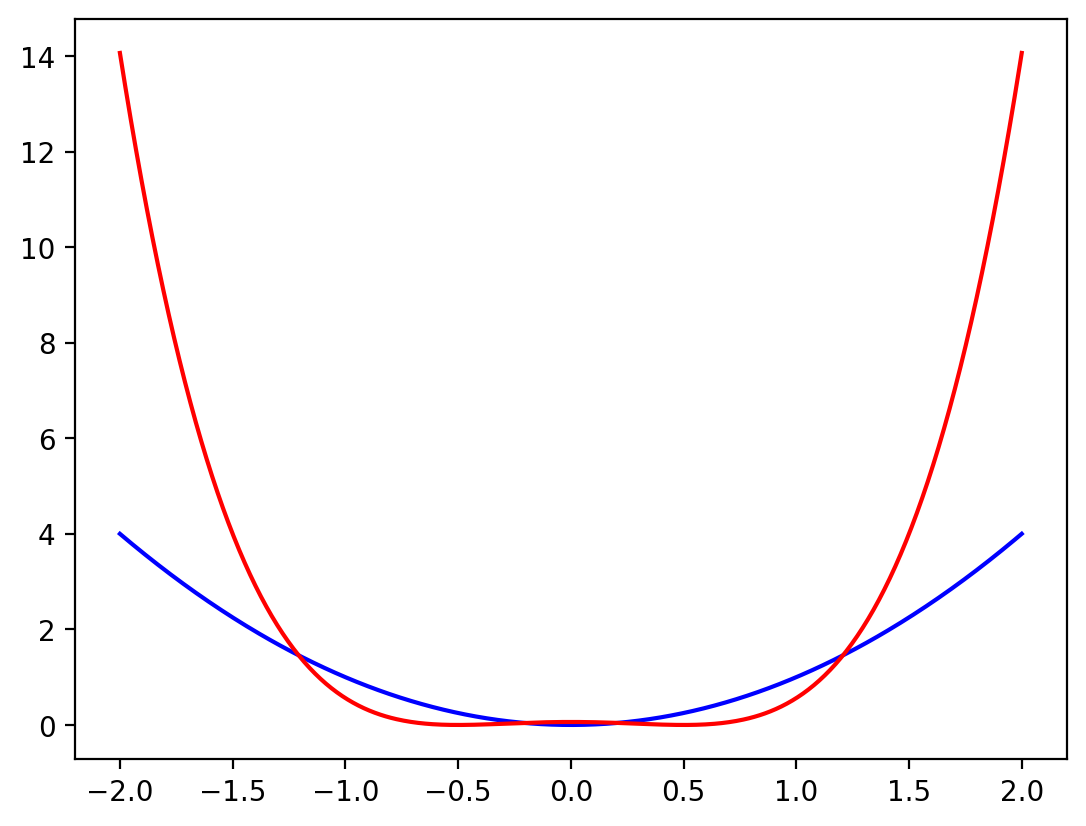

In [3]:
xs = np.linspace(-2, 2, 500)
aust = np.array([austenite_potential(Matrix([[1, x], [0, 1]])) for x in xs])
mart = np.array([martensite_potential(Matrix([[1, x], [0, 1]])) for x in xs])
plt.plot(xs, aust, color="blue")
plt.plot(xs, mart, color="red")

### Austenite percentage

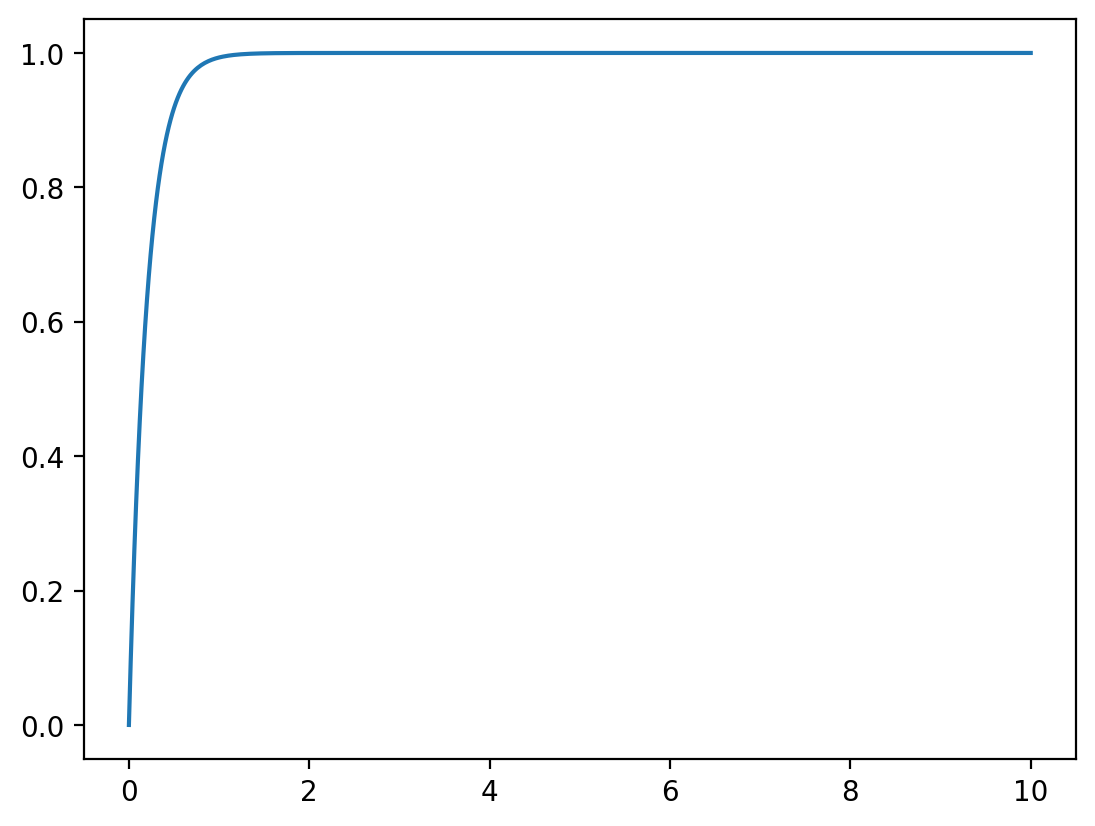

In [4]:
ts = np.linspace(0, 10, 500)
ps = np.array([austenite_percentage(t) for t in ts])
plt.plot(ts, ps)

### Total elastic energy

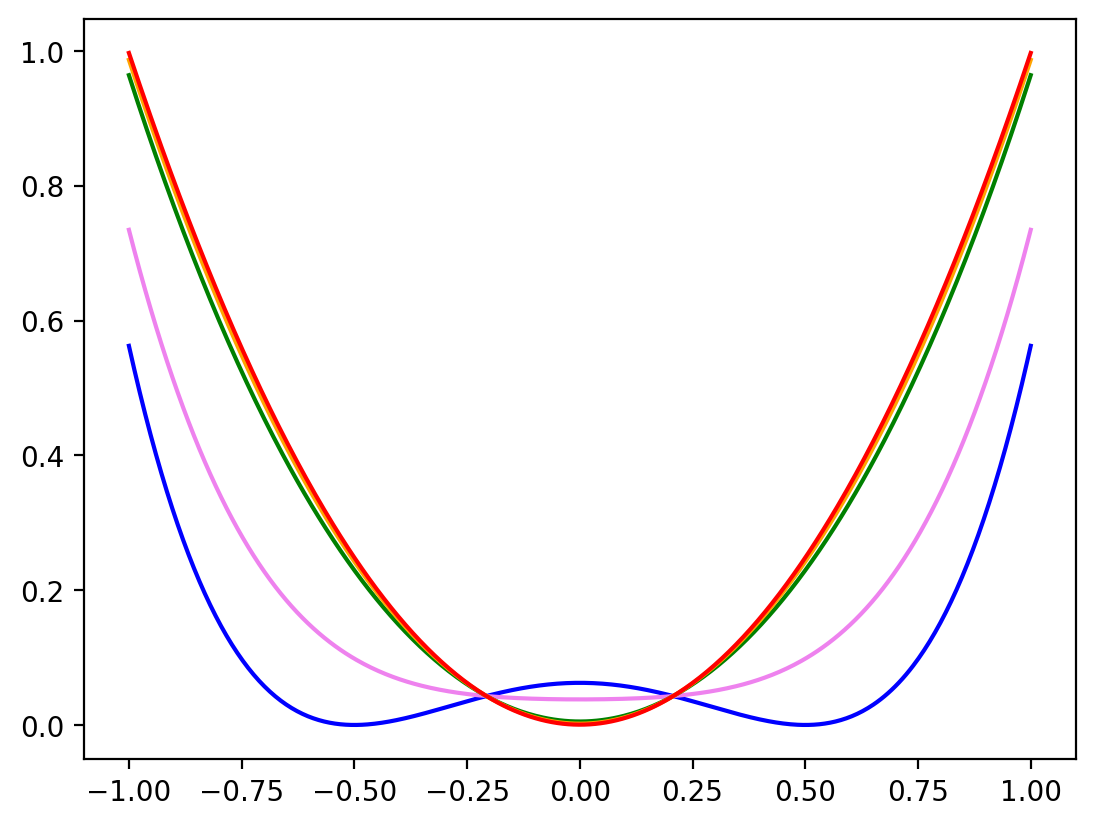

In [5]:
xs = np.linspace(-1, 1, 500)


def total(theta):
    return np.array([total_elastic_potential(Matrix([[1, x], [0, 1]]), theta) for x in xs])


plt.plot(xs, total(0), color="blue")
plt.plot(xs, total(0.1), color="violet")
plt.plot(xs, total(0.5), color="green")
plt.plot(xs, total(0.7), color="orange")
plt.plot(xs, total(1), color="red")

In [47]:
fps = 1
eps = 1 / 10
params = SimulationParams(initial_temperature=0.0, search_radius=100, fps=fps, scale=eps)
domain = RectangleDomain(width=1, height=2, fix=["lower"])

stress_end = 7
simulation_end = stress_end + 13
num_steps = int(simulation_end * fps)

def external_temperature(t: float):
    if t >= stress_end:
        return 0.3
    return 0


def boundary_traction(t: float, x: float, y: float):
    if t < stress_end and y > 1 - eps / 4 and x >= 0.25 and x <= 0.75:
        return [0, 7]
    return [0, 0]


sim = Simulation(domain, params, external_temperature, boundary_traction)
num_steps

20

In [48]:
sim.run(num_steps=num_steps - 2)

  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:48<00:00,  2.70s/it]


In [49]:
sim.max_temp()

0.27324880508555893

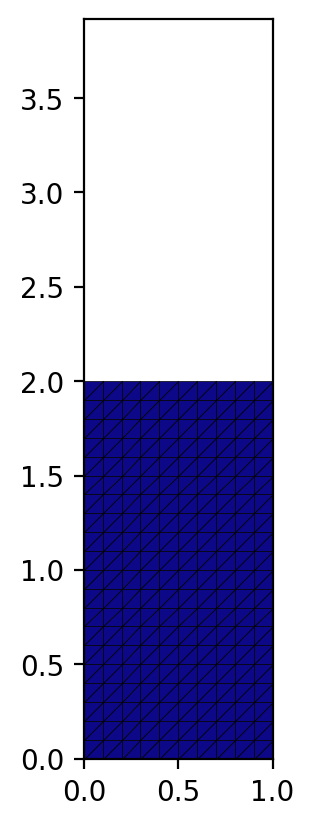

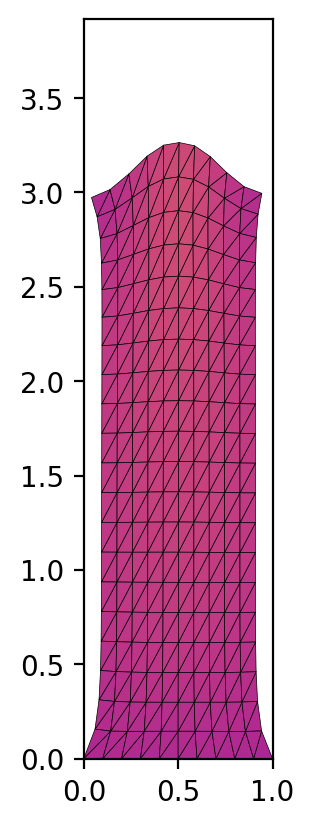

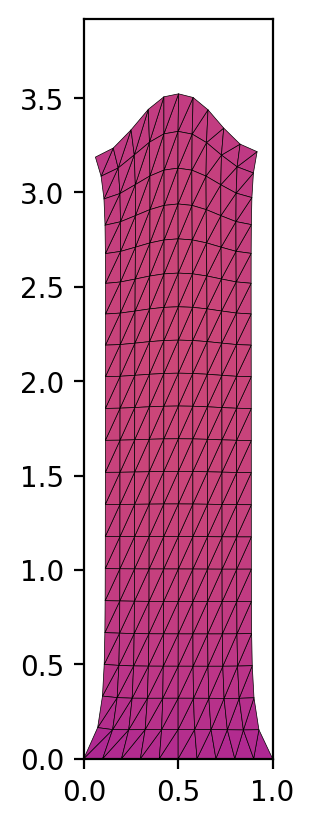

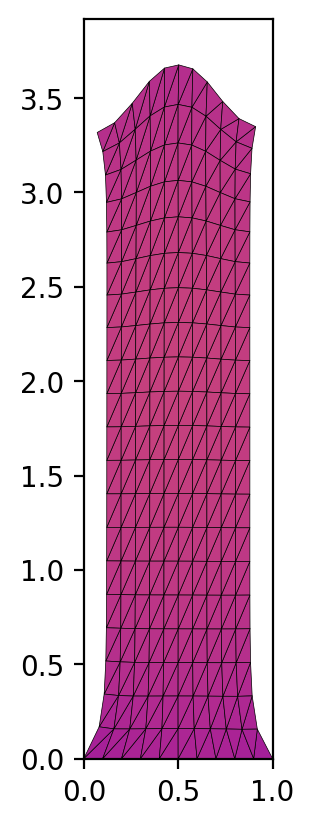

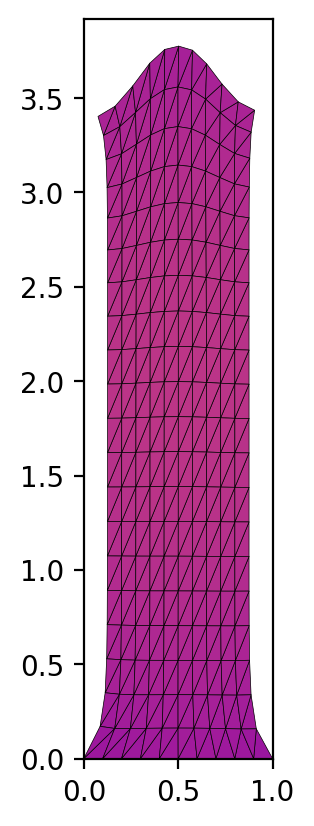

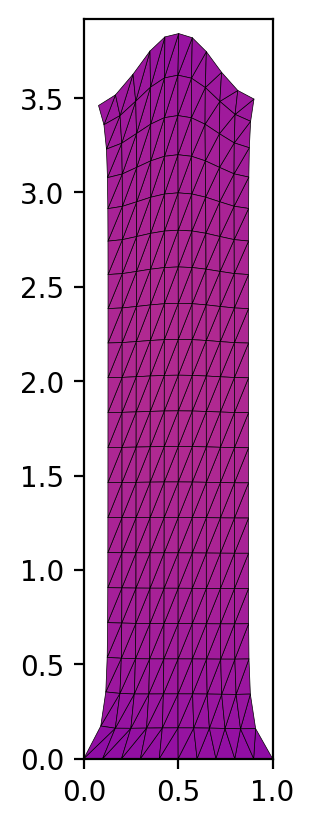

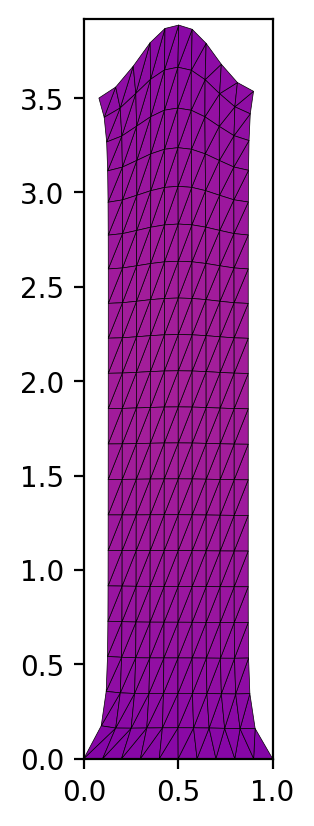

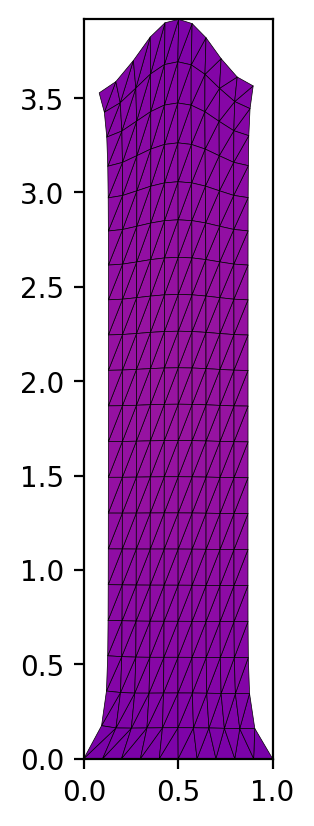

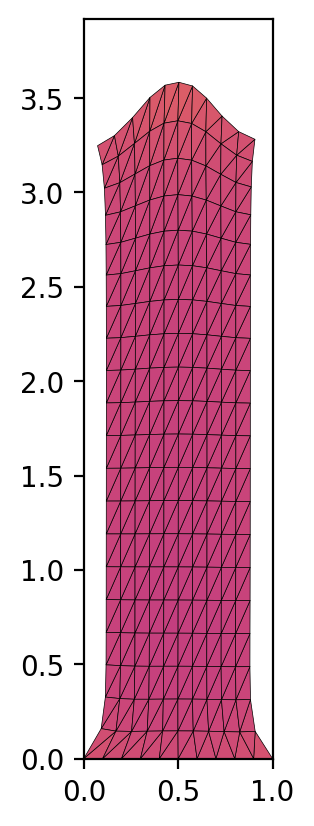

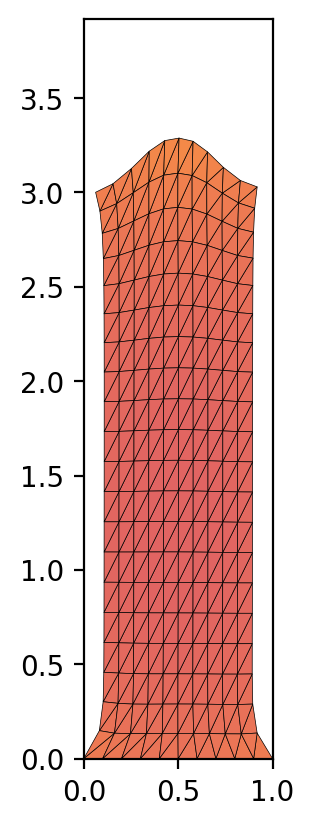

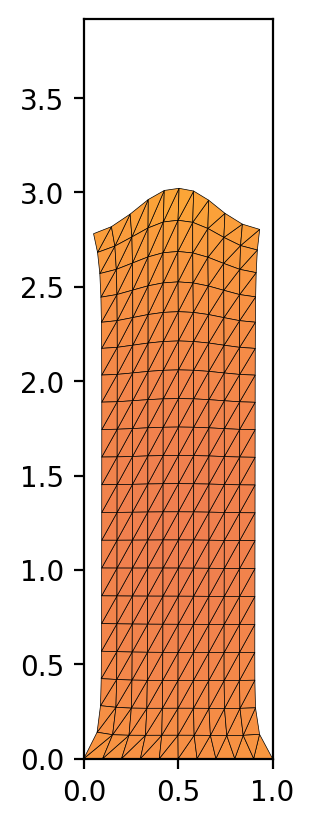

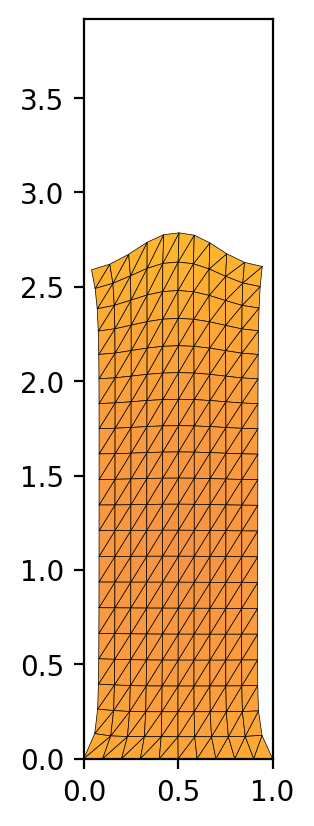

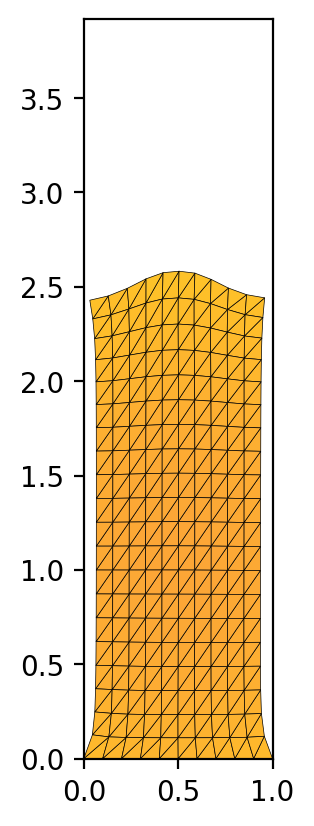

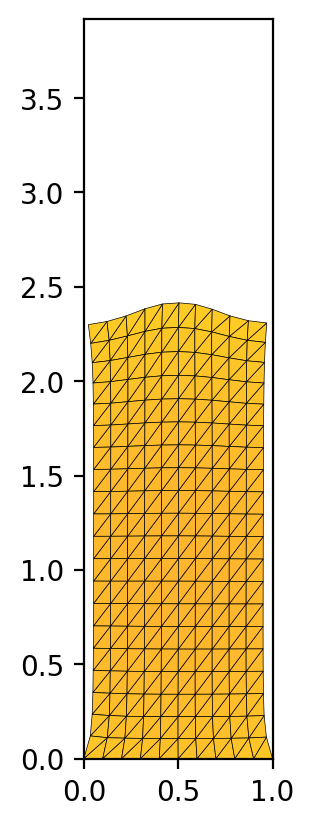

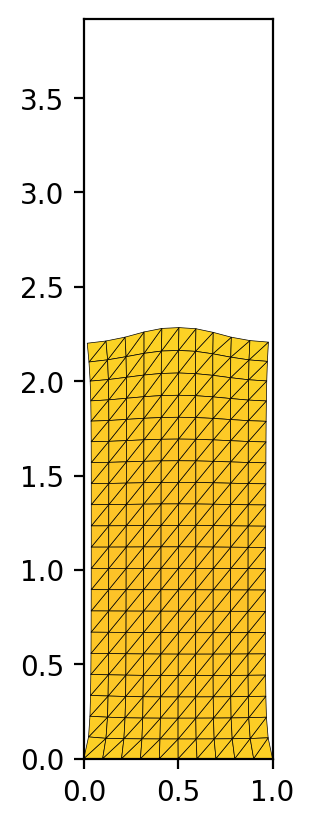

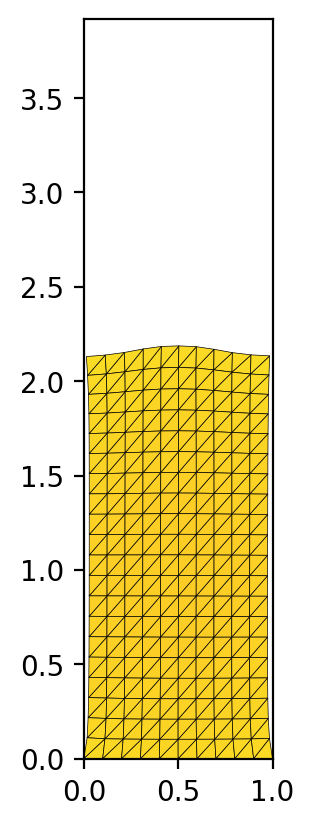

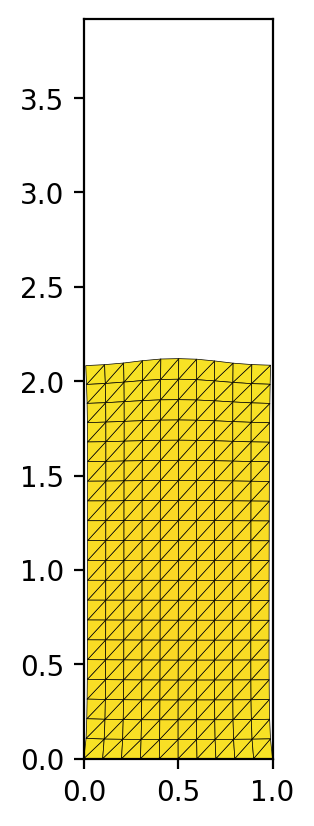

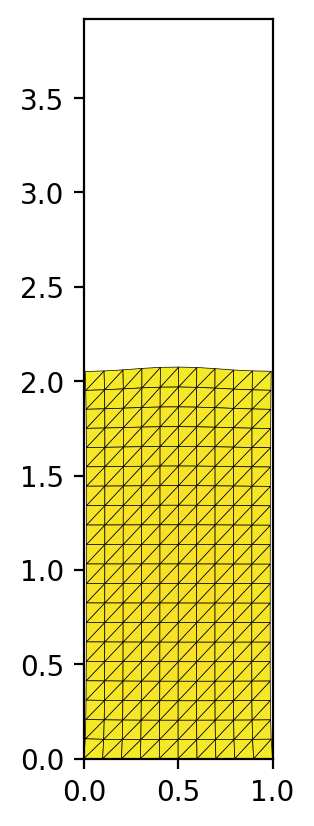

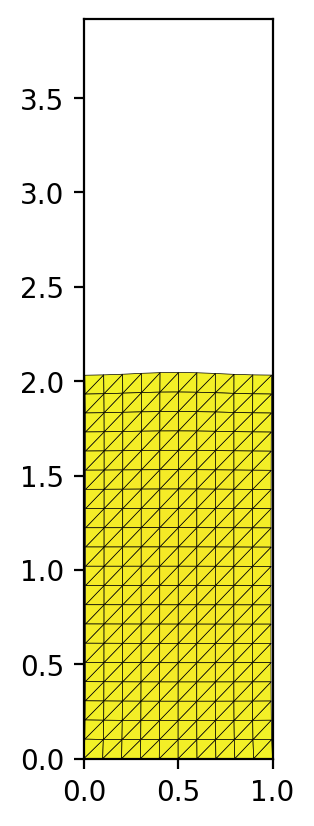

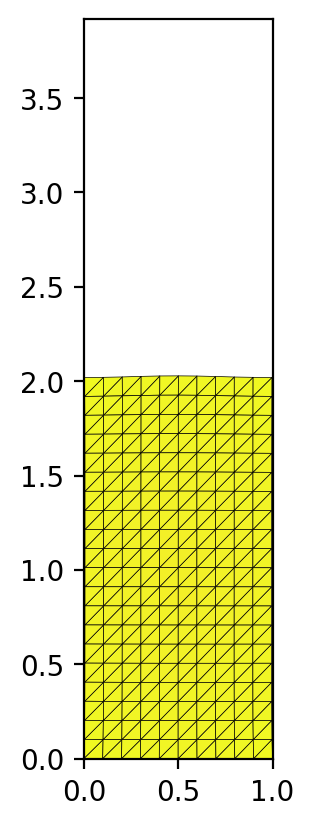

In [50]:
for i in range(len(sim.steps)):
    sim.plot_step(i)

(<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>)

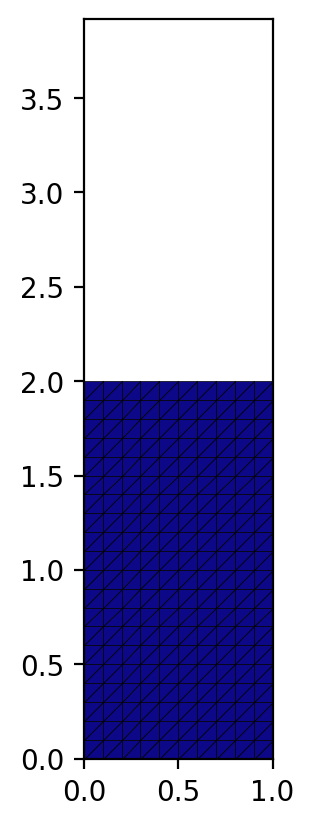

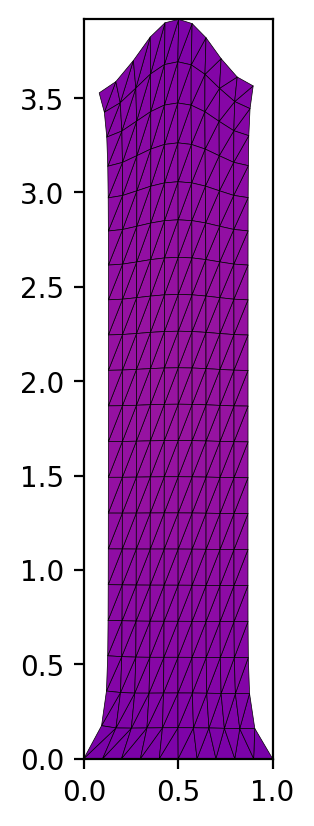

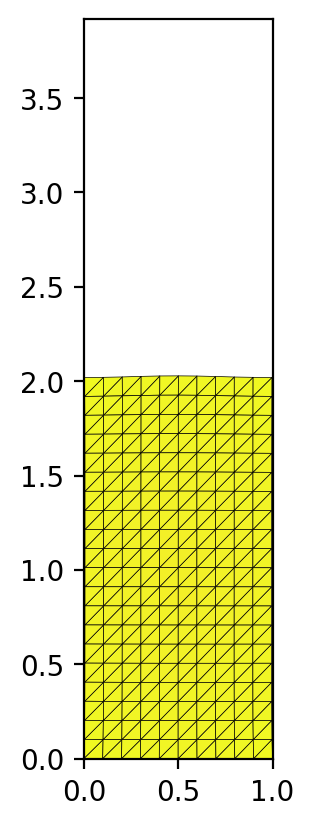

In [51]:
sim.plot_step(0), sim.plot_step(int(stress_end * fps)), sim.plot_step(-1)

In [57]:
fps = 15
eps = 1 / 15
params = SimulationParams(initial_temperature=0.0, search_radius=100, fps=fps, scale=eps)
num_steps = int(simulation_end * fps)

sim = Simulation(domain, params, external_temperature, boundary_traction)
sim.run(num_steps=num_steps - 2)

100%|██████████| 298/298 [29:24<00:00,  5.92s/it]


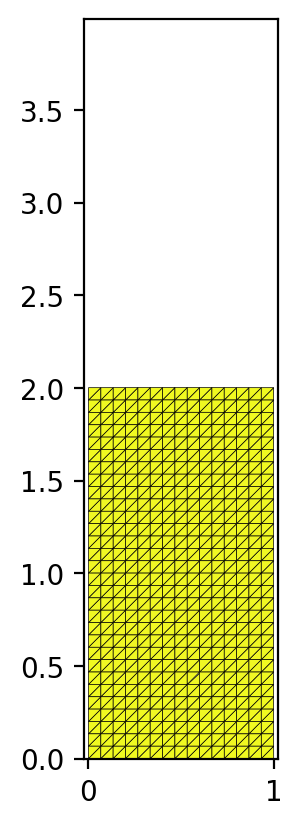

In [58]:
sim.save_animation()